In [1]:
# Import necessary libraries

import numpy as np   # python library for numerical operations
import pandas as pd   # for dealing with multi-dimensional dataframes
import matplotlib.pyplot as plt   # for plotting graphs and visualizations
import seaborn as sns      # for plotting graphs and visualizations
from sklearn import preprocessing   # For data preprocessing operations
import scipy.stats as stats              # For statistical models and operations
from sklearn.model_selection import train_test_split   # To split the dataset into train and test
from collections import Counter     # For counting samples and such operations
from imblearn.over_sampling import SMOTE    # SMOTE algorithm for data resampling and de-skew
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report   # evaluation metrics for models
from sklearn import metrics  # evaluation metrics for models

/home/shamsudheen/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/shamsudheen/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/shamsudheen/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/shamsudheen/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning:

In [2]:
# Read the preprocessed dataset saved

data = pd.read_csv('preprocessed_1.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,...,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


In [4]:
data.shape

(145460, 25)

#### There are 145460 samples and 24 features and 1 label (RainTomorrow)

#### Check the number of Yes (1) and No (0) in RainTomorrow label

/home/shamsudheen/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

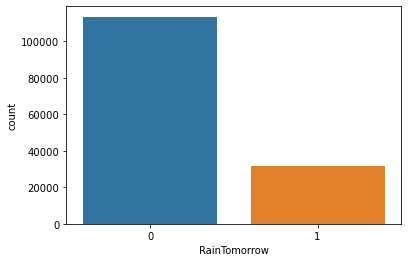

In [5]:
sns.countplot(data["RainTomorrow"])

In [6]:
len(data.RainTomorrow)

145460

In [7]:
data.RainTomorrow.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

#### Out of the 145460 samples, 113583 are in class 0 (No RainTomorrow) and 31877 are in class 1 (Yes RainTomorrow)

#### This is called Class imbalance/The Class skew

Less number of features in a class
This has to be solved
There shoud be equal number of samples in Yes and No of 'RainTomorrow'

Bevcause of class skew, the model will learn the majority class well compared to the minority class so the model will be biased

#### Solve it using SMOTE algorithm (Synthetic Minority Oversampling TEchnique)

There are many techniques to solve class imbalance/class skew

'minority over-sampling' and 'majority undersampling' are to name a few.
But they are their drawbacks.

SMOTE (Synthetic Minority Oversampling TEchnique) is better method that generate more data samples by itself and strore it in the class where samples are less.

In [8]:
X = data.drop(["RainTomorrow", "Date"], axis=1)    # X data or the independant variables
Y = data["RainTomorrow"]    # y data or the label (RainTomorrow)

In [9]:
# Split the total dataset into Train and Test at a ratio 80:20
# 80% data = Train data
# 20% data = Test data
# Train data = For training
# Test data = For testing


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [10]:
# Number of samples in train data

X_train.shape

(116368, 23)

In [11]:
# Number of samples in test data

X_test.shape

(29092, 23)

In [12]:
sm=SMOTE(random_state=0) # Call the SMOTE function

X_train_res, y_train_res = sm.fit_resample(X_train, y_train) # Apply the function to the data to resample it


print("The number of classes before SMOTE {}".format(Counter(y_train))) # Count the 0 and 1 data before resampling
print("The number of classes after SMOTE {}".format(Counter(y_train_res))) # Count the 0 and 1 data after resampling

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f370e42bb80>
Traceback (most recent call last):
  File "/home/shamsudheen/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/shamsudheen/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/shamsudheen/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/shamsudheen/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


The number of classes before SMOTE Counter({0: 90866, 1: 25502})
The number of classes after SMOTE Counter({0: 90866, 1: 90866})


#### before it was 90866 0-samples and 25502 1-samples
#### Now it is 90866 samples in each 0 and 1

# Train the model

###  Decision Tree Classifier

This problem is a supervised binary classification task

The ML model should be able to predict a ransomware or not

Decision tree algorithm is famous for binary classification.

They classify a data sampleby using a hierarchy of if/else questions about the features, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 

In [13]:
# Import Decision Tree algorithm from sk learn library's tree bundle 
from sklearn.tree import DecisionTreeClassifier

In [14]:
# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)   # Define the max depth of tree equal to 5

In [15]:
# fit the data to the model ie; training
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=5)

In [16]:
#Now we have to predict using the trained Decision tree model


y_train_tree = tree.predict(X_train_res)
y_test_tree = tree.predict(X_test)

In [17]:
#computing the accuracy of the model performance

acc_train_tree = accuracy_score(y_train_res,y_train_tree)   #Train accuracy
acc_test_tree = accuracy_score(y_test,y_test_tree)   #Test accuracy

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.783
Decision Tree: Accuracy on test Data: 0.780


#### Try max_depth = 10

In [18]:
# instantiate the model
tree = DecisionTreeClassifier(max_depth = 10)   # Define the max depth of tree equal to 10

In [19]:
# fit the data to the model ie; training
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=10)

In [20]:
#Now we have to predict using the trained Decision tree model


y_train_tree = tree.predict(X_train_res)
y_test_tree = tree.predict(X_test)

In [21]:
#computing the accuracy of the model performance

acc_train_tree = accuracy_score(y_train_res,y_train_tree)   #Train accuracy
acc_test_tree = accuracy_score(y_test,y_test_tree)   #Test accuracy

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.840
Decision Tree: Accuracy on test Data: 0.798


## Loop through 1 to 100 to get the best value for max_depth

In [22]:
accs = []    # To save the accuracies

for i in range (1, 101, 1):     # Loop through 1 to 100
    # instantiate the model
    tree = DecisionTreeClassifier(max_depth = i)   # Define the max depth of tree
    tree.fit(X_train_res, y_train_res)           # fit the data to the model ie; training
    y_test_tree = tree.predict(X_test)          # Make predictions
    acc_test_tree = accuracy_score(y_test,y_test_tree)   # Find test accuracy
    accs.append(acc_test_tree)    # save the accuracy

In [23]:
# Print and see the accuracies

accs     

[0.7802488656675375,
 0.6686374260965213,
 0.8148975663412622,
 0.7244947064485082,
 0.7802488656675375,
 0.7481781933177506,
 0.7810050873092259,
 0.7854736697373849,
 0.7932421284201843,
 0.7976075897153857,
 0.8074384710573353,
 0.8038979788257941,
 0.8055479169531142,
 0.8037604839818506,
 0.8032105046060772,
 0.7969201154956689,
 0.7899078784545579,
 0.7902516155644164,
 0.786711123332875,
 0.7818644300838719,
 0.7810050873092259,
 0.7765021311700812,
 0.7775677162106421,
 0.7766396260140245,
 0.7734084971813557,
 0.77419909253403,
 0.7730991337824832,
 0.7725147806957239,
 0.771002337412347,
 0.7703492369036161,
 0.7707617214354462,
 0.7728928915165681,
 0.771002337412347,
 0.7715866904991063,
 0.7710367111233328,
 0.7701429946377011,
 0.769730510105871,
 0.7716210642100921,
 0.7715523167881204,
 0.7703836106146019,
 0.7715179430771346,
 0.7706929740134745,
 0.7710710848343187,
 0.770796095146432,
 0.7706586003024887,
 0.7687680461982676,
 0.7715523167881204,
 0.7709335899903753,

### The accuracy does not seem to be increasing beyond 77% after 100

### The best is 81.48% for max_depth = 3

In [24]:
# instantiate the model
tree = DecisionTreeClassifier(max_depth = 3)   # Define the max depth of tree equal to 10

In [25]:
# fit the data to the model ie; training
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=3)

In [26]:
#Now we have to predict using the trained Decision tree model


y_train_tree = tree.predict(X_train_res)
y_test_tree = tree.predict(X_test)

In [27]:
#computing the accuracy of the model performance

acc_train_tree = accuracy_score(y_train_res,y_train_tree)   #Train accuracy
acc_test_tree = accuracy_score(y_test,y_test_tree)   #Test accuracy

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.740
Decision Tree: Accuracy on test Data: 0.815


In [55]:
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))   # Generate the confusion matrix

[[20470  2247]
 [ 3138  3237]]


In [56]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))  # Print other metrics

0.8148975663412622
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     22717
           1       0.59      0.51      0.55      6375

    accuracy                           0.81     29092
   macro avg       0.73      0.70      0.71     29092
weighted avg       0.81      0.81      0.81     29092



/home/shamsudheen/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


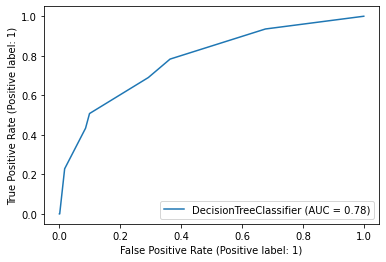

In [57]:
metrics.plot_roc_curve(tree, X_test, y_test)  # Plot the AUC curve

### Model 2: Gradient Boost Classifier

In [30]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
GBoost = GradientBoostingClassifier(n_estimators=100, max_depth= 3, random_state=0)

In [59]:
GBoost.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=0)

In [60]:
y_train_gb = tree.predict(X_train_res)
y_test_gb = tree.predict(X_test)

In [61]:
GBoost.score(X_test, y_test)

0.825553416746872

In [68]:
y_pred = GBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))   # Generate the confusion matrix

[[20048  2669]
 [ 2406  3969]]


In [69]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))  # Print other metrics

0.825553416746872
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     22717
           1       0.60      0.62      0.61      6375

    accuracy                           0.83     29092
   macro avg       0.75      0.75      0.75     29092
weighted avg       0.83      0.83      0.83     29092



/home/shamsudheen/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


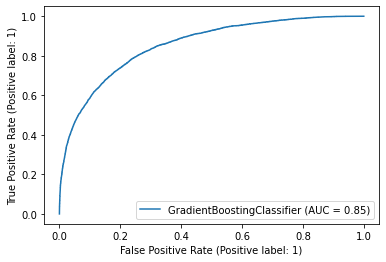

In [67]:
metrics.plot_roc_curve(GBoost, X_test, y_test)  # Plot the AUC curve

#### Save the models

In [54]:
joblib.dump(tree, "tree.pkl")   # Save the Decision tree and xgboost models as pickle files
joblib.dump(GBoost, "gboost.pkl")

['gboost.pkl']